<a href="https://colab.research.google.com/github/carlotta-marchis/tensorflow/blob/master/CNN_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classify handwritten digits using a CNN

For this small project I will use the famous MNIST handwritten digit database, containing 70,000 images of handwritten digits. The aim is to train a Convolutional Neural Network model to classify those images.

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

print(tf.__version__)

2.2.0-rc1


## What is a CNN?

A **Convolutional Neural Network** (CNN) is a neural network where the image, instead of being fed as it is to the deep neural network, it is filtered first, by passing it through **convolutional layers** (ConvLayer) and **pooling layers**. 

- In the **ConvLayers**, filters (also called kernels) are applied to the image. The role of those filters is to capture interdependencies within neighboring pixels and highlight image features.
- The **pooling layers** compress the image, enhance the features selected by the convolution layers and suppress the noise.

![](https://miro.medium.com/max/1400/1*uAeANQIOQPqWZnnuH-VEyw.jpeg)

To better understand, let's look at the example in the figure (original version was taken from [this](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53) blog post):

1. The **input image** has 28x28 pixels. It is fed into the first convolution layer. 

2. The first convolution layer **Conv_1** uses n1 5x5 kernels (or filters), thus producing n1 filtered 24x24 images. 

  $$\rm filtered~image~size = original~image~size -(kernel~size - 1)$$

3. The n1 filtered 24x24 images are fed into the **Max-Pooling** layer, which uses a 2x2 kernel, thus halfing the size of the filtered images.

4.  An additional convolution layer **Conv_2** is applied to the n1 12x12 filted and pooled images. Conv_2 uses n2 5x5 filters thus producing n1xn2 filtered 8x8 images.

5. The n1xn2 filtered 8x8 images are fed to the Max-Pooling layer.

6. The resulting n1xn2 4x4 images are flattened and fed into the deep network.

Note: The filters of the convolutional neural network are learned by the network itself. Infact, they are additional parameters which are first randomly initialized and then updated after each epoch. This process is called **feature extraction**.  

## Importing the dataset

Here we import the famous MNIST dataset, which contains 70,000 images of 9 cathegories, i.e. the digits from 0 to 9. Each image is 28 x 28 pixels, for a total of 784 pixels, where each pixel is associated to an integer between 0 and 255, inclusive.

In [0]:
mnist = keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

* The `X_train` and `y_train` arrays are the **training set** images and labels respectively, which are used to train the model.
* The model is tested against the **test set**, i.e. the `X_test`, and `y_test` arrays.

The following figure shows the first 49 images of the dataset:

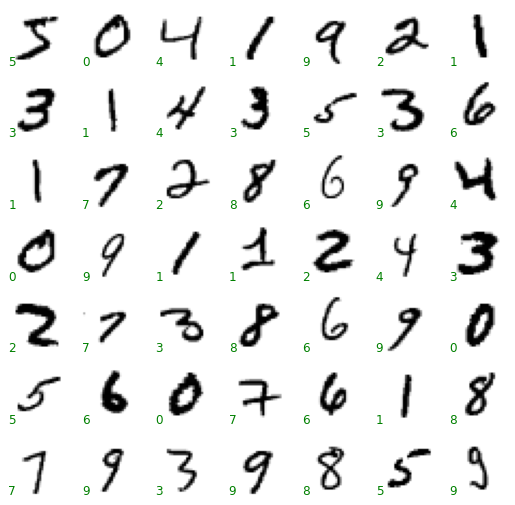

In [3]:
plt.figure(figsize=(9,9))
for i in range(49):
  plt.subplot(7, 7, i+1)
  plt.imshow(X_train[i], cmap='binary')
  plt.text(0,27, y_train[i], color='green')
  plt.xticks([])
  plt.yticks([])
plt.show()

## Explore the data

As we mentioned above the dataset is splitten into a training set and a test set.

In [4]:
X_train.shape

(60000, 28, 28)

`X_train` containes 60,000 images, each of which is represented as 28 x 28 pixel.

In [5]:
y_train.shape

(60000,)

Likewise there are 60,000 labels in the training set.

In [6]:
print('Each label is an integer between ' + str(y_train.min()) + ' and ' + str(y_train.max()) + '.')

Each label is an integer between 0 and 9.


In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
y_test.shape

(10000,)

The test set contains 10,000 28 x 28 images with 10,000 labels.

## Preprocessing the data 

In [9]:
print('Each pixel has a value between 0 and ' + str(X_train[0].max()) + ' inclusive:')

Each pixel has a value between 0 and 255 inclusive:


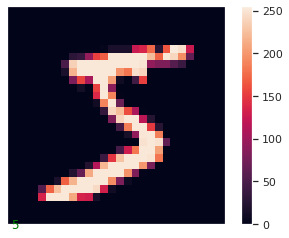

In [10]:
plt.figure()
plt.imshow(X_train[0])
plt.text(0,28, y_train[0], color='green')
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.show()

We therefore need to scale these values to a range of 0 and 1 before using them to train a neural network model. The test set has to be preprocessed in the same way.

In [0]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Moreover, the data needs to be reshaped, as a CNN expect a 4-dimensional array:

In [0]:
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

## Model architecture

In [0]:
# Configuring the network architecture
model = keras.Sequential([
        keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
                          ])

Here is the complete architecture of the model:

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

1. The first layer in this network, `tf.keras.layers.Conv2D`, is a ConvLayer whit 64 3x3 kernels. 
2. The second layer is a MaxPooling layer. 
3. The resulting images are flattened and fed into a dense layer with 128 nodes.
4. The output layer has 10 nodes, corresponding to the 10 classes, i.e. the digits from 0 to 9. 


## Compiling and training the model

In [15]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 80s 43ms/step - loss: 0.1228 - accuracy: 0.9622 - val_loss: 0.0571 - val_accuracy: 0.9806
Epoch 2/5
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0397 - accuracy: 0.9874 - val_loss: 0.0331 - val_accuracy: 0.9897
Epoch 3/5
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0275 - accuracy: 0.9913 - val_loss: 0.0415 - val_accuracy: 0.9877
Epoch 4/5
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0194 - accuracy: 0.9937 - val_loss: 0.0328 - val_accuracy: 0.9907
Epoch 5/5
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0148 - accuracy: 0.9952 - val_loss: 0.0369 - val_accuracy: 0.9900


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.99 (or 99%) on the training data.

### Evaluating the model

313/313 - 3s - loss: 0.0369 - accuracy: 0.9900


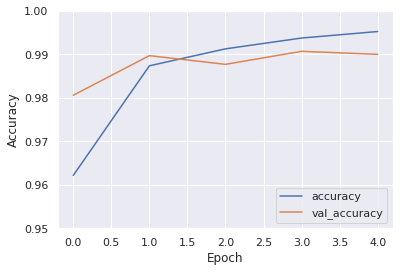

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.95, 1])
plt.legend(loc='lower right')


test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [17]:
print('\nTest accuracy:', test_acc)


Test accuracy: 0.9900000095367432


This CNN has achieved a test accuracy of about 99%.

## Making predictions

The model can now be used to make predictions by calling the `predict` method:

In [0]:
predictions = model.predict(X_test)

`predictions` consists of 10,000 arrays of 10 numbers, representing the probabilities for each sample of belonging to one of the 10 classes (the digits between 0 and 9).

In [19]:
predictions.shape

(10000, 10)

In [20]:
predictions[0]

array([7.6674283e-12, 1.2910948e-09, 4.8602886e-09, 1.9740437e-08,
       2.0742483e-08, 7.5436657e-11, 4.4986147e-14, 1.0000000e+00,
       4.3613052e-10, 1.4103710e-08], dtype=float32)

### Verifying predictions


These two functions will help us visualize the result of the prediction.

In [0]:
def plot_image(i, prediction_arrays, true_labels, imgages):
  predicted_label, true_label, imgage = np.argmax(prediction_arrays[i]), true_labels[i], imgages[i]
  
  plt.grid(False)
  plt.imshow(imgage, cmap='binary')
  plt.xticks([])
  plt.yticks([])

  plt.text(0,28, predicted_label, color='blue' if predicted_label == true_label else 'red')
  

def plot_labels(i, prediction_arrays, true_labels):
  predicted_label, true_label = np.argmax(prediction_arrays[i]), true_labels[i]
  
  plt.grid(False)
  thisplot = plt.bar(range(10), prediction_arrays[i], color="#777777")
  plt.xticks(range(0,10))
  plt.yticks([])
  plt.ylim([0, 1])
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  

Now, let's look at the first 15 images whose labels are incorrectly predicted by the model:



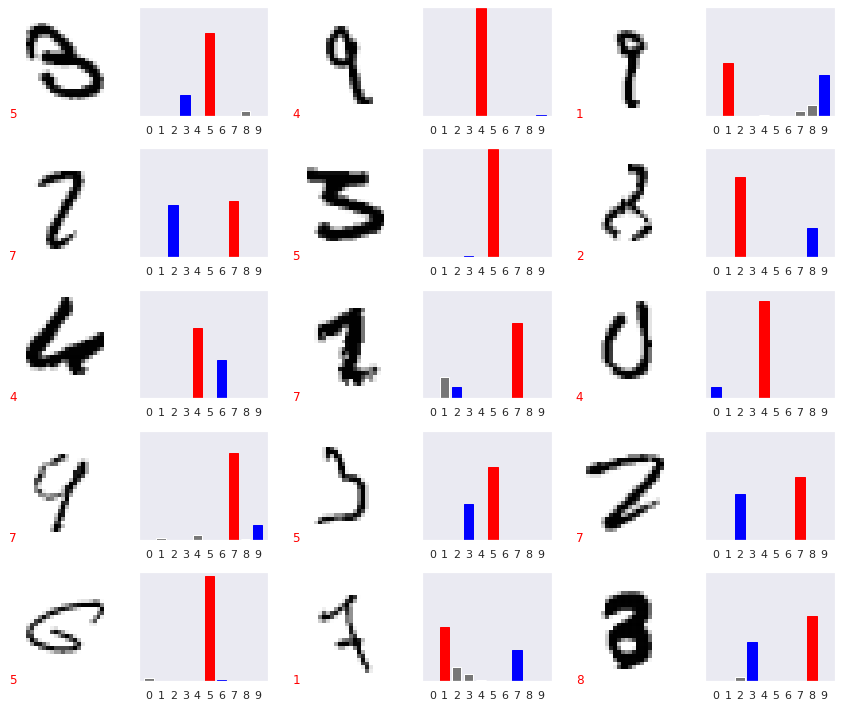

In [24]:
predicted_labels = []

for i in range(len(predictions)):
  predicted_labels.append(np.argmax(predictions[i]))

select_incorrect = ~(predicted_labels == y_test)

incorrect_predictions = predictions[select_incorrect]
incorrect_images = X_test[select_incorrect]
incorrect_images = np.reshape(incorrect_images, 
                              (incorrect_images.shape[0], incorrect_images.shape[1], incorrect_images.shape[2]))
incorrect_labels = y_test[select_incorrect]

# Plot the first n_row*n_cols test images and the labels probabilities
n_rows = 5
n_cols = 3
n_images = n_rows*n_cols

plt.figure(figsize=(2*2*n_cols,2*n_rows))
for i in range(n_images):
  plt.subplot(n_rows, 2*n_cols, 2*i+1)
  plot_image(i, incorrect_predictions, incorrect_labels, incorrect_images)
  plt.subplot(n_rows, 2*n_cols, 2*i+2)
  plot_labels(i, incorrect_predictions, incorrect_labels)
plt.tight_layout()
plt.show()

Those are some of the handwritten digits that the model incorrectly predicts.

## Conclusions

In this notebook a simple CNN model was built, compiled and trained. It consisted of two convolution layers and one deep layer, which reached a test accuracy of 99%.